In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from pandas import DataFrame
import math

# 朴素贝叶斯(Naive bayes)

## 贝叶斯分类器
对于[感知机](./perceptron.ipynb)、[逻辑回归](./logistic_regression.ipynb)和[支持向量机](./support_vector_machines.ipynb)都是通过[经验误差最小原则](./theory.ipynb)寻找决策边界，这种称为判别模型(Discriminative model)，还有一种叫做**生成模型(Generative model)**。

生成模型是尝试寻找数据集$D$的正负类分布来获取决策边界，判别模型就好比在刷题但是没有真正理解题目的思想，因此只有遇到刷到的题才能给出正确答案，而生成模型是在学习数据集的分布，也就是在尝试理解题目的思想，遇到没有刷过的题也能够举一反三。

贝叶斯分类器是根据[贝叶斯定理](./theory.ipynb)分别计算特征$\boldsymbol{x}$为正类和负类的概率

$$\begin{aligned}
P(y|\boldsymbol{x}) &= \frac{P(y)}{P(\boldsymbol{x})} P(\boldsymbol{x}|y) \\\\
    &= \frac{P(y)}{P(x_1, x_2, \cdots, x_n)} P(x_1, x_2, \cdots, x_n | y)
\end{aligned}$$

由于$P(x_1, x_2, \cdots, x_n)$是[输入](./linear_regression.ipynb)，换言之，$\boldsymbol{x}$是特征的分布，在计算$P(y=+1|\boldsymbol{x})$和$P(y=-1|\boldsymbol{x})$分母都是$P(x_1, x_2, \cdots, x_n)$，因此可以忽略，即

$$P(y|x_1, \cdots, x_n) \propto P(y)P(x_1, \cdots, x_n|y)$$

那么$\boldsymbol{x}$的类别为

$$\hat{y}=\operatorname*{argmax}_{y}P(y)P(x_1, \cdots, x_n|y)$$

上述这种采用贝叶斯定理完成分类的算法称为贝叶斯分类器(Bayes classifier)。

## 朴素贝叶斯
贝叶斯分类器中$P(y)$可以根据训练集中类别$y$出现的频率决定，而$P(x_1, \cdots, x_n|y)$也是通过训练集得到的。

假设特征$x_i$是离散的随机变量，并且有$m_i$中可能的值，那么特征向量总共包含$\prod_{i=1}^{n}m_i$中可能，另外再假设每种可能的特征向量在每个类别下至少包含50条数据数据才可信，那么训练集$D$需要

$$2 \times 50 \prod_{i=1}^{n}m_i$$

条样本才能保证学习是可行的，比如现在有13维的特征，每个特征都满足伯努利分布，那么需要

$$2 \times 50 \times 2^{13} = 819200 $$

条样本，这在实操中往往无法实现。

朴素贝叶斯假设每个特征都是[相互独立](./theory.ipynb)的，那么只要知道

$$P(x_1|y), P(x_2|y), \cdots ,P(x_n|y)$$

根据[条件独立](./theory.ipynb)的假设，就可以计算

$$\begin{aligned}
P(x_1, x_2, \cdots, x_n|y) &= P(x_1|y)P(x_2|y)\cdots P(x_n|y) \\\\
    &= \prod_{i=1}^{n}P(x_i|y)
\end{aligned}$$

在这种假设下，对于$n$维特征向量，假设每个特征每个类别都需要50条样本才能保证数据可信，那么数据集的大小为

$$2 \times 50 \sum_{i=1}^{n}m_i$$

还是以13维特征，每个特征服从伯努利分布，那么数据集大小为

$$2 \times 50 \times (2 \times 13) = 2600 $$

数据集大小和维度是线性关系，保证了学习是可行的。

在相互独立特征假设的条件下，贝叶斯分类器的分类公式可以改写为

$$\hat{y}=\operatorname*{argmax}_y P(y)\prod_{i=1}^{n}P(x_i|y)$$

这种对每个特征作出相互独立的假设的贝叶斯分类器称为朴素贝叶斯(Naive bayes)。

$P(x_i|y)$的计算主要是需要看特征分布，首先猜测$x_i$属于哪种分布，然后再根据该分布计算$P(x_i|y)$，下面我们介绍基于伯努利分布的伯努利贝叶斯和基于高斯分布的高斯朴素贝叶斯。

## 伯努利朴素贝叶斯
如果每个特征都满足伯努利分布，那么可以使用伯努利朴素贝叶斯来学习

$$P(x_i|y)=P(x_i=1|y)x_i+(1-P(x_i=1|y))(1-x_i)$$

以包含两个特征举例，那么对于正类有

$$\begin{aligned}
P(x_1=1|y=+1)=p &, \ P(x_2=1|y=+1)=q \\\\
P(x_1=0|y=+1)=1-p &, \ P(x_2=0|y=+1)=1-q
\end{aligned}$$

正类的分布为

$$\begin{array}{c|c}
    \hline
    \quad X_1\overset{\LARGE\setminus}{\phantom{.}}\overset{\Large X_2}{\phantom{l}} \quad &\quad 0\quad&\quad 1\quad\\
    \hline
    \\
    0 &\quad (1-p) \cdot (1-q) \quad&\quad (1-p) \cdot q \quad\\
    \\
    1 &\quad p \cdot (1-q) \quad&\quad p \cdot q \quad\\
    \\
    \hline
\end{array}$$

对于特征$\boldsymbol{x}=(1, 1)$计算其正类概率为：

$$\begin{aligned}
P(y=+1|x_1=1, x_2=1) &= \frac{P(y=+1)}{P(x_1=1, x_2=1)} P(x_1=1,x_2=1|y=+1) \\\\
    &= \frac{P(y=+1)}{P(x_1=1, x_2=1)}P(x_1=1|y=+1)P(x_2=1|y=+1) \\\\
    &= \frac{P(y=+1)}{P(x_1=1, x_2=1)}p \cdot q

\end{aligned}$$

同理我们也可以得到$P(y=-1|x_1=1, x_2=1)$，最后比较两者大小就可以知道$(1, 1)$对应的类别了。

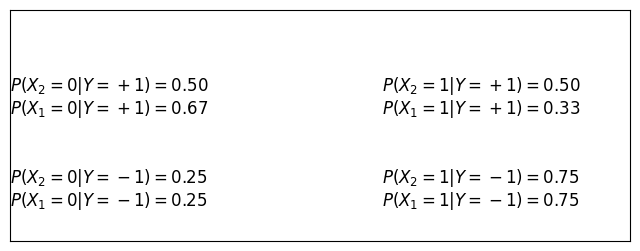

In [3]:
X = np.array([[1, 1], [1, 1], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [0, 0], [0, 0], [1, 1]])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1, 1, 1])

def likehood(X: np.ndarray, y: np.ndarray) -> (np.ndarray, np.ndarray):
    """get P(xi|y)
    return positive(n_feature, 2)
           negative(n_feature, 2)
        positive[i][0] => p(xi=0|y=1)
        positive[i][1] => p(xi=1|y=1)
    """
    n_feature = X.shape[1]
    positive, negative = np.array([]), np.array([])
    for i in range(n_feature):
        # 第i维特征
        xx = X[:, i]
        for cl in (-1, 1):
            total = (y[y==cl]).shape[0]
            xy = xx[y==cl]
            for j in (0, 1):
                xi = xy[xy==j]
                p = xi.shape[0] / total
                if cl == 1:
                    positive = np.append(positive, p)
                else:
                    negative = np.append(negative, p)
    positive = positive.reshape((X.shape[1], 2))
    negative = negative.reshape((X.shape[1], 2))
    return positive, negative

positive, negative = likehood(X, y)                
fig, ax = plt.subplots(figsize=(8, 3))
ax.set(xticks=[], yticks=[])
figy = 0.15

for cl, arr in zip((-1, 1), (negative, positive)):
    text = r"$P(X_{}={}|Y={:+})={:.2f}$"
    for i in range(arr.shape[0]):
        for j in [0, 1]:
            ax.annotate(text.format(i+1, j, cl, arr[i][j]), xy=(0.6*j, figy), fontsize=12)
        figy += 0.1
    figy += 0.2

plt.show()

In [9]:
# 伯努利朴素贝叶斯
class BernoulliNaiveBayes:
    X: np.ndarray
    y: np.ndarray
    positive: np.ndarray
    negative: np.ndarray
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = X
        self.y = y
        self.positive, self.negative = likehood(X, y)

    def joint_probability(self, X:np.ndarray) -> (float, float):
        """ 
        P(y|X)
        """
        if X.shape.__len__() == 2 and X.shape[1] == self.X.shape[1]:
            X = X[0]
        probability = []
        for cl, arr in zip((-1, 1), (self.negative, self.positive)):
            p = (y[y==cl]).shape[0] / y.shape[0] # p(y)
            for i in range(X.shape[0]):
                p *= arr[i][X[i]] # p(xi|y)
            probability.append(p)
        return probability[0], probability[1]
    
    def predict(self, X: np.ndarray) -> int:
        negative, positive = self.joint_probability(X)
        return -1 if negative > positive else 1

clf = BernoulliNaiveBayes(X, y)
feature = np.array([1, 1])
probability = clf.joint_probability(feature)
print(f"{feature} is {clf.predict(feature)}, negative probability: {probability[0]:.2f}, positive pobability: {probability[1]:.2f}")

[1 1] is -1, negative probability: 0.23, positive pobability: 0.10


也可以使用sklearn封装好的伯努利朴素贝叶斯

**TODO: 为什么计算出来的概率不一样？**

In [15]:
clf = BernoulliNB(alpha=0, force_alpha=True)
clf.fit(X, y)
feature = feature.reshape(1, -1)
probability = clf.predict_proba(feature)[0]
print(f"{feature} is {clf.predict(feature)}, negative probability: {probability[0]:.2f}, positive pobability: {probability[1]:.2f}")

[[1 1]] is [-1], negative probability: 0.61, positive pobability: 0.39


### 拉普拉斯平滑
还是以2维特征向量为例子，有

$$\begin{aligned}
P(X_1=0|Y=+1)=0, P(X_2=0|Y=+1)=b \\
P(X_1=1|Y=+1)=c, P(X_2=1|Y=+1)= d
\end{aligned}$$

那么正类分布为

$$
\begin{array}{c|c}
    \hline
    \quad X_1\overset{\LARGE\setminus}{\phantom{.}}\overset{\Large X_2}{\phantom{l}} \quad &\quad 0\quad&\quad 1\quad\\
    \hline
    \\
    0 &\quad 0 \quad&\quad 0\quad\\
    1 &\quad b \times c \quad&\quad b \times d\quad\\
    \\
    \hline
\end{array}$$

即使$P(X_2=0|Y=+1)$和$P(X_2=1|Y=+1)$不为0，由于作出条件独立的假设，最终有

$$\begin{aligned}
P(X_1=0,X_2=0|Y=+1) &= 0\\
P(X_1=0,X_2=1|Y=+1) &= 0
\end{aligned}$$

导致出现该问题的原因是数据集$D$中不包含$X_1=0$的且类别为正类的样本，可以通过在数据集$D$中给每种可能性都增加不少于1条的数据，比如各增加1条数据，其中$n$是数据集$D$的大小，现在追加如下四条数据，同理负类也需要追加相应四条数据。

$$\begin{array}{c|c|c|c}
\hline
    \quad\quad& x_{i1}&x_{i2}&y\\
    \hline
    i=n+1&0&0&+1\\\hline
    i=n+2&0&1&+1\\\hline
    i=n+3&1&0&+1\\\hline
    i=n+4&1&1&+1\\\hline
\end{array}$$

那为什么说是可以增加数量不等呢，比如根据先验知识（经验）有，$(1,1)$更有可能属于正类，那么就可以多增加几条，这种增加数据避免产生概率为0的情况称作拉普拉斯平滑(Laplacian smoothing)，其中先验知识就是超参数，可以手动调参。

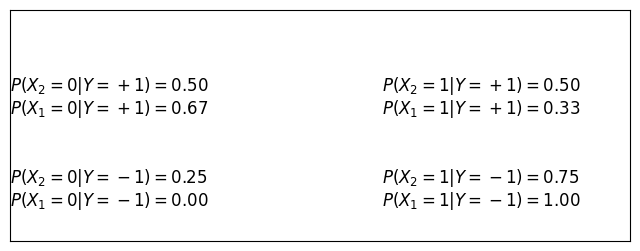

In [96]:
X = np.array([[1, 1], [1, 1], [1, 0], [1, 1], [1, 0], [0, 1], [0, 1], [0, 0], [0, 0], [1, 1]])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1, 1, 1])

positive, negative = likehood(X, y)                
fig, ax = plt.subplots(figsize=(8, 3))
ax.set(xticks=[], yticks=[])
figy = 0.15

for cl, arr in zip((-1, 1), (negative, positive)):
    text = r"$P(X_{}={}|Y={:+})={:.2f}$"
    for i in range(arr.shape[0]):
        for j in [0, 1]:
            ax.annotate(text.format(i+1, j, cl, arr[i][j]), xy=(0.6*j, figy), fontsize=12)
        figy += 0.1
    figy += 0.2

plt.show()

上面的例子中有$P(X_1=0|Y=-1)=0$，这会导致$P(X_1=0,X_2=0|Y=-1)$和$P(X_1=0,X_2=1|Y=-1)$都是0，使用拉普拉斯平滑给每个可能性都加上一条数据。

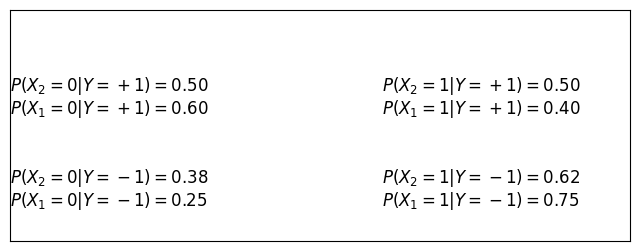

In [97]:
newX = np.append(X, [[0, 0], [0, 1], [1, 0], [1, 1]], axis=0)
newy = np.append(y, [-1, -1, -1, -1])
newX = np.append(newX, [[0, 0], [0, 1], [1, 0], [1, 1]], axis=0)
newy = np.append(newy, [1, 1, 1, 1])
positive, negative = likehood(newX, newy)                
fig, ax = plt.subplots(figsize=(8, 3))
ax.set(xticks=[], yticks=[])
figy = 0.15

for cl, arr in zip((-1, 1), (negative, positive)):
    text = r"$P(X_{}={}|Y={:+})={:.2f}$"
    for i in range(arr.shape[0]):
        for j in [0, 1]:
            ax.annotate(text.format(i+1, j, cl, arr[i][j]), xy=(0.6*j, figy), fontsize=12)
        figy += 0.1
    figy += 0.2

plt.show()

In [98]:
clf = BernoulliNaiveBayes(newX, newy)
print(f"{feature} is {clf.predict(feature)}")

clf = BernoulliNB(force_alpha=False)
clf.fit(X, y)
print(f"{feature} is {clf.predict(feature)}")

[[1 1]] is -1
[[1 1]] is [-1]


## 高斯朴素贝叶斯

伯努利朴素贝叶斯只能用于特征是离散的随机变量，并且服从伯努利分布，无法处理连续的随机变量，如果特征的分布服从[正态分布](./theory.ipynb)，那么可以使用高斯朴素贝叶斯。

我们看下sklearn中的安德森鸢尾花数据集，只取两种类别以及两个特征。

首先看下每个特征的直方概率密度图。观察直方概率密度图，有点像正态分布，也就是高斯分布，高斯分布为

$$p(x_i|y)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$$

包含两个参数$\mu$和$\sigma$，其中$\mu$是期望，$\sigma$是标准差。

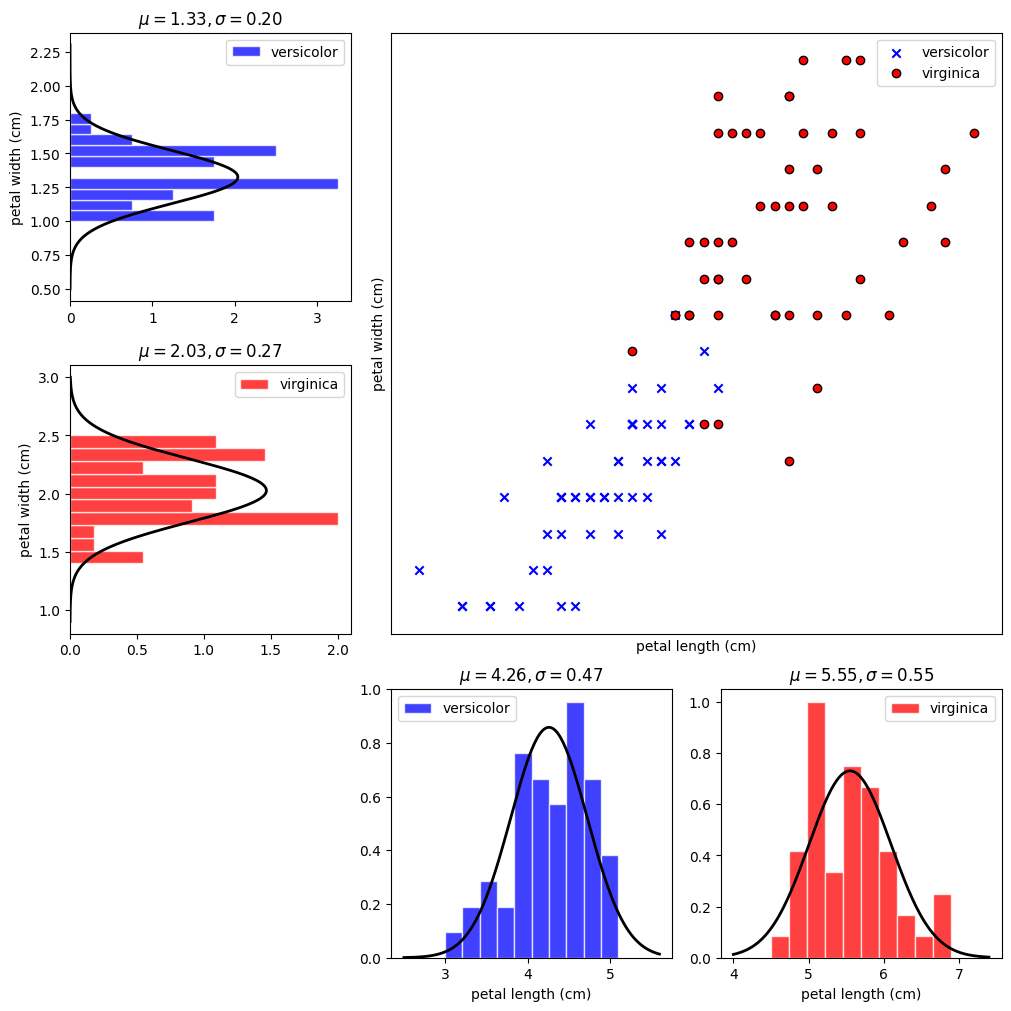

In [35]:
iris = load_iris()
X = iris.data[50: 150, [2, 3]]
y = iris.target[50:150]

fig = plt.figure(layout="constrained", figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0:2, 1:])
ax2 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[2, 2])
axes = fig.axes

markers = ('x', 'o')
colors = ("blue", "red")
axes[0].set(xticks=[], yticks=[])
axes[0].set_xlabel(iris.feature_names[2])
axes[0].set_ylabel(iris.feature_names[3])

for cl, m, color in zip(np.unique(y), markers, colors):
    edgecolors = 'k'
    if m == 'x':
        edgecolors = None
    axes[0].scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, 
               edgecolors=edgecolors, marker=m, label=iris.target_names[cl])
axes[0].legend()

for ax, cl, color in zip((axes[3], axes[4]), np.unique(y), colors):
    xx = X[y==cl, 0]
    mu = np.mean(xx)
    sigma = np.std(xx)
    ax.hist(X[y==cl, 0], 10, label=iris.target_names[cl], 
            facecolor=color, ec='w', alpha=0.75, density=True)
    xx = np.linspace(xx.min()-0.5, xx.max()+0.5, 200)
    yy = np.exp(-(xx - mu) ** 2 / (2 * sigma ** 2)) / (math.sqrt(2*math.pi)*sigma) 
    ax.plot(xx, yy, color="black", linewidth=2) 
    ax.set_xlabel(iris.feature_names[2])
    ax.set_title(r"$\mu={:.2f}, \sigma={:.2f}$".format(mu, sigma))
    ax.legend()

for ax, cl, color in zip((axes[1], axes[2]), np.unique(y), colors):
    xx = X[y==cl, 1]
    mu = np.mean(xx)
    sigma = np.std(xx)
    ax.hist(X[y==cl, 1], 10, label=iris.target_names[cl], 
            facecolor=color, ec='w', alpha=0.75, density=True, orientation="horizontal")
    xx = np.linspace(xx.min()-0.5, xx.max()+0.5, 200)
    yy = np.exp(-(xx - mu) ** 2 / (2 * sigma ** 2)) / (math.sqrt(2*math.pi)*sigma) 
    ax.plot(yy, xx, color="black", linewidth=2) 
    ax.set_title(r"$\mu={:.2f}, \sigma={:.2f}$".format(mu, sigma))
    ax.set_ylabel(iris.feature_names[3])
    ax.legend()

plt.show()

根据朴素贝叶斯特征之间是相护独立的假设，那么很容易计算下面的联合概率

$$P(x_1,x_2,\cdots,x_n)=P(x_1|y)P(x_2|y)\cdots P(x_n|y)$$

对于安德森鸢尾花数据集中的概率就是

$$\begin{aligned}
    P(x_1, x_2|y) &= P(x_1|y)P(x_2|y) \\\\
    &= \frac{1}{\sigma_{1}\sqrt{2\pi}}e^{-\frac{(x_1-\mu_{1})^2}{2\sigma_{1}^2}} \cdot \frac{1}{\sigma_{2}\sqrt{2\pi}}e^{-\frac{(x_2-\mu_{2})^2}{2\sigma_{2}^2}}
\end{aligned}$$

下图中黑色曲线是决策边界，将两种类别划分开来，每种类别的概率都以等高线的方式呈现出来。

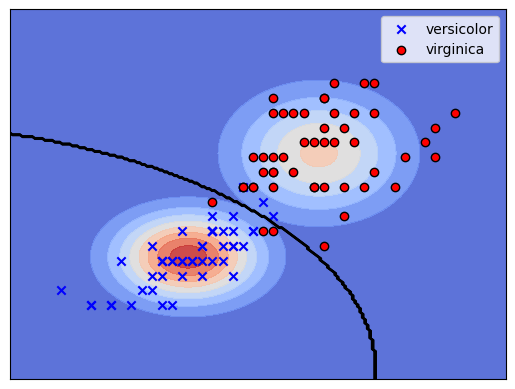

In [80]:
def get_mu(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    X: [nsample, nfeature]
    y: [nclass,]
    return
        mu: [nfeature, nclass]
    """
    classes = np.unique(y)
    n_feature = X.shape[1]
    mu = np.zeros((n_feature, classes.shape[0]))
    for i in range(n_feature):
        xx = X[:, i]
        idx = 0
        for cl in classes:
            xy = xx[y==cl]
            mu[i][idx] = np.mean(xy)
            idx += 1
    return mu

def get_sigma(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """ 
    see get_mu
    """
    classes = np.unique(y)
    n_feature = X.shape[1]
    sigma = np.zeros((n_feature, classes.shape[0]))
    for i in range(n_feature):
        xx = X[:, i]
        idx = 0
        for cl in classes:
            xy = xx[y==cl]
            sigma[i][idx] = np.std(xy)
            idx += 1
    return sigma

class GaussianNaiveBayes:
    mu: np.ndarray
    sigma: np.ndarray
    py: np.ndarray
    class_name: np.ndarray

    def __init__(self, X:np.ndarray, y: np.ndarray):
        self.mu, self.sigma = get_mu(X, y), get_sigma(X, y)
        self.py = np.array([(y[y==cl]).shape[0] / y.shape[0] for cl in np.unique(y)])
        self.class_name = np.unique(y)

    def joint_probability(self, X: np.ndarray) -> np.ndarray:
        probability = np.zeros((self.class_name.shape[0]))
        for i in range(self.class_name.shape[0]):
            mu, sigma = self.mu[:, i], self.sigma[:, i]
            c = math.sqrt(2 * math.pi) * np.power(sigma, -1) * \
                np.exp(np.power(-2 * np.power(sigma, 2), -1) * np.power(X-mu, 2))
            probability[i] = np.prod(c) * self.py[i]
        return probability

    def predict_probability(self, X: np.ndarray) -> float:
        return self.joint_probability(X).max()

    def predict(self, X: np.ndarray):
        probability = self.joint_probability(X)
        class_ = self.class_name[0]
        max_p = probability[0]
        for i in range(self.class_name.shape[0]):
            if probability[i] > max_p:
                max_p = probability[i]
                class_ = self.class_name[i]
        return class_
    
gnb = GaussianNaiveBayes(X, y)

ax = plt.subplot()
ax.set(xticks=[], yticks=[])
cm = ListedColormap(('blue', 'red'))
x1, x2 = X[:, 0], X[:, 1]
x1, x2 = np.linspace(x1.min() - 0.5, x1.max() + 0.5, 200), \
      np.linspace(x2.min() - 0.5, x2.max() + 0.5, 200)
xx, yy = np.meshgrid(x1, x2)
Z = np.array([gnb.predict_probability(feat) for feat in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, 10, cmap="coolwarm", alpha=0.9)
Z = np.array([gnb.predict(feat) for feat in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, antialiased=True, colors='k', linewidths=1, alpha=1)

for cl, m, color in zip(np.unique(y), markers, colors):
    edgecolors = 'k'
    if m == 'x':
        edgecolors = None
    ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, 
               edgecolors=edgecolors, marker=m, label=iris.target_names[cl])

ax.legend()
plt.show()